In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
train_data = keras.utils.image_dataset_from_directory(
    directory = 'Data\\Training',
    labels = 'inferred',
    label_mode ='int',
    color_mode ='rgb',
    batch_size = 32,
    image_size = (48, 48),
    shuffle = True
)

test_data = keras.utils.image_dataset_from_directory(
    directory = 'Data\\Validation',
    labels = 'inferred',
    label_mode = 'int',
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (48, 48),
    shuffle = True
)

Found 47029 files belonging to 2 classes.
Found 11649 files belonging to 2 classes.


In [3]:
# Normalize
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_data = train_data.map(process)
test_data = test_data.map(process) 

In [4]:
model = Sequential()

model.add(Conv2D(64, (5, 5), padding = 'valid', activation = 'relu', input_shape = (48, 48, 3)))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
# model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
# model.add(Dropout(0.25))

model.add(Conv2D(12, (3, 3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
# model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid')) 

In [5]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 44, 44, 64)        4864      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 12)          3468      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 12)         0

In [6]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',         # You can monitor 'val_accuracy' instead
    patience=5,                 # Number of epochs to wait for improvement
    restore_best_weights=True   # Restore the best weights
)

history = model.fit(train_data, epochs = 200, validation_data=test_data, callbacks=[early_stopping])

Epoch 1/200
1470/1470 [==============================] - 380s 256ms/step - loss: 0.3561 - accuracy: 0.8459 - val_loss: 0.2068 - val_accuracy: 0.9254
Epoch 2/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1951 - accuracy: 0.9287 - val_loss: 0.1606 - val_accuracy: 0.9417
Epoch 3/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1680 - accuracy: 0.9384 - val_loss: 0.1574 - val_accuracy: 0.9435
Epoch 4/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1540 - accuracy: 0.9444 - val_loss: 0.1357 - val_accuracy: 0.9510
Epoch 5/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1456 - accuracy: 0.9471 - val_loss: 0.1298 - val_accuracy: 0.9538
Epoch 6/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1373 - accuracy: 0.9516 - val_loss: 0.1265 - val_accuracy: 0.9529
Epoch 7/200
1470/1470 [==============================] - 12s 8ms/step - loss: 0.1325 - accuracy: 0.9527 - val_loss: 0.122

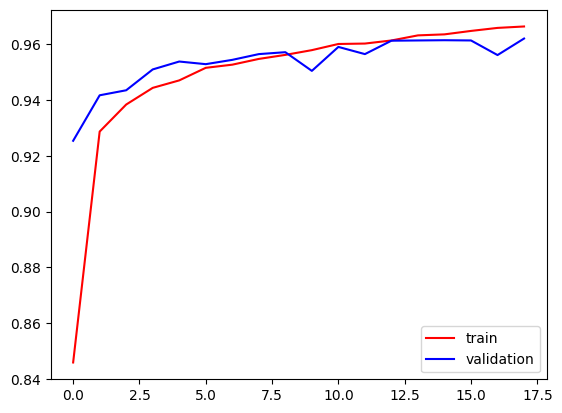

In [7]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [10]:
model.save('best_model.h5')

In [11]:
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

365/365 [==============================] - 2s 6ms/step - loss: 0.1045 - accuracy: 0.9613
Test Loss: 0.10451332479715347
Test Accuracy: 0.9612842202186584
